### Importing Libraries 

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

# Loading Train and Test Data

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
Train = pd.read_csv("train.csv")

In [5]:
Test = pd.read_csv("test.csv")

# Understand The Poverty_Data

In [6]:
Train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0

In [7]:
Test.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.250000,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.250000,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.500000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.250000,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.000000,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.000000,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.250000,64.00,NaN,324
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,16,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,0,0,0,1,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,38,256,1444,4,0,0,1.000000,0.00,182.25,1444
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,11,NaN,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,8ee7365a8,0,2,0,2,no,no,11,13.5,0,0,0,0,1,0,0,0,0,2,1.000000,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,42,121,1764,4,0,0,1.000000,0.00,182.25,1764
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,0,0,0,2,2,0,2,2,2,2,14,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0

In [8]:
print("Shape of Train_Data :",Train.shape)
print("Shape of Test_Data  :",Test.shape)

Shape of Train_Data : (9557, 143)
Shape of Test_Data  : (23856, 142)


# Information about Train_Data 

In [9]:
Train.info(143)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               object 
 1    v2a1             float64
 2    hacdor           int64  
 3    rooms            int64  
 4    hacapo           int64  
 5    v14a             int64  
 6    refrig           int64  
 7    v18q             int64  
 8    v18q1            float64
 9    r4h1             int64  
 10   r4h2             int64  
 11   r4h3             int64  
 12   r4m1             int64  
 13   r4m2             int64  
 14   r4m3             int64  
 15   r4t1             int64  
 16   r4t2             int64  
 17   r4t3             int64  
 18   tamhog           int64  
 19   tamviv           int64  
 20   escolari         int64  
 21   rez_esc          float64
 22   hhsize           int64  
 23   paredblolad      int64  
 24   paredzocalo      int64  
 25   paredpreb        int64  
 26   pareddes         i

# Information about Test_Data 

In [10]:
Test.info(142)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 142 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               object 
 1    v2a1             float64
 2    hacdor           int64  
 3    rooms            int64  
 4    hacapo           int64  
 5    v14a             int64  
 6    refrig           int64  
 7    v18q             int64  
 8    v18q1            float64
 9    r4h1             int64  
 10   r4h2             int64  
 11   r4h3             int64  
 12   r4m1             int64  
 13   r4m2             int64  
 14   r4m3             int64  
 15   r4t1             int64  
 16   r4t2             int64  
 17   r4t3             int64  
 18   tamhog           int64  
 19   tamviv           int64  
 20   escolari         int64  
 21   rez_esc          float64
 22   hhsize           int64  
 23   paredblolad      int64  
 24   paredzocalo      int64  
 25   paredpreb        int64  
 26   pareddes        

In [11]:
Train_info = pd.DataFrame(columns=['Name Columns' , 'Null Values' , 'Dtype' , 'Unique Values'])

for i in range(0, len(Train.columns)):
       Train_info.loc[i] = [Train.columns[i],
                         Train[Train.columns[i]].isnull().sum(),
                         Train[Train.columns[i]].dtypes,
                         Train[Train.columns[i]].nunique()] 
Train_info


,Name Columns,Null Values,Dtype,Unique Values
0,Id,0,object,9557
1,v2a1,6860,float64,157
2,hacdor,0,int64,2
3,rooms,0,int64,11
4,hacapo,0,int64,2
5,v14a,0,int64,2
6,refrig,0,int64,2
7,v18q,0,int64,2
8,v18q1,7342,float64,6
9,r4h1,0,int64,6


# Data Integration (Training and Testing)

In [12]:
df = pd.concat((Train,Test))
print("Shape of data : ", df.shape)

Shape of data :  (33413, 143)


In [13]:
df.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4.0
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.0,64,4.0
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0

In [14]:
df.tail(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
23846,ID_f0c9c06f7,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,5,NaN,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,24,25,576,36,25,4,36.0,0.25,33.0625,576,NaN
23847,ID_4b7feead3,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,5,NaN,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,57,25,3249,36,25,4,36.0,0.25,33.0625,3249,NaN
23848,ID_c2650e696,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,0,NaN,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,1,0,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,18,0,324,36,25,4,36.0,0.25,33.0625,324,NaN
23849,ID_64958963c,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,5,NaN,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,47,25,2209,36,25,4,36.0,0.25,33.0625,2209,NaN
23850,ID_ecdf63132,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,8,NaN,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,0,0,1,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,27,64,729,36,25,4,36.0,0.25,33.0625,729,NaN
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,10,9,100,36,25,4,36.0,0.25,33.0625,100,NaN
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,6,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,yes,6,no,6.00,0,0,1,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,54,36,2916,16,36,4,4.0,1.00,36.0000,2916,NaN
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,4,1.0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0

In [15]:
df.info(143)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33413 entries, 0 to 23855
Data columns (total 143 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               object 
 1    v2a1             float64
 2    hacdor           int64  
 3    rooms            int64  
 4    hacapo           int64  
 5    v14a             int64  
 6    refrig           int64  
 7    v18q             int64  
 8    v18q1            float64
 9    r4h1             int64  
 10   r4h2             int64  
 11   r4h3             int64  
 12   r4m1             int64  
 13   r4m2             int64  
 14   r4m3             int64  
 15   r4t1             int64  
 16   r4t2             int64  
 17   r4t3             int64  
 18   tamhog           int64  
 19   tamviv           int64  
 20   escolari         int64  
 21   rez_esc          float64
 22   hhsize           int64  
 23   paredblolad      int64  
 24   paredzocalo      int64  
 25   paredpreb        int64  
 26   pareddes        

In [16]:
df_info = pd.DataFrame(columns=['Name Columns' , 'Null Values' , 'Dtype' , 'Unique Values'])

for i in range(0, len(df.columns)):
       df_info.loc[i] = [df.columns[i],
                         df[df.columns[i]].isnull().sum(),
                         df[df.columns[i]].dtypes,
                         df[df.columns[i]].nunique()] 
df_info

,Name Columns,Null Values,Dtype,Unique Values
0,Id,0,object,33413
1,v2a1,24263,float64,302
2,hacdor,0,int64,2
3,rooms,0,int64,15
4,hacapo,0,int64,2
5,v14a,0,int64,2
6,refrig,0,int64,2
7,v18q,0,int64,2
8,v18q1,25468,float64,6
9,r4h1,0,int64,7


# Columns Contain Null Values (v2a1 , v18q1 ,rez_esc ,meaneduc ,SQBmeaned ,Target)

# Integer Values

In [17]:
integer_features = df.select_dtypes(include=['int64']).columns

print("Total Number of integer Features :" , integer_features.shape[0])

print('─' * 125)

print("Integer Features Names : " , integer_features.tolist())


Total Number of integer Features : 129
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Integer Features Names :  ['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 

# Float Values

In [18]:
Float_features = df.select_dtypes(include=['float64']).columns

print("Total Number of Floating Features :" , Float_features.shape[0])

print('─' * 125)

print("Floating Features Names : " , Float_features.tolist())


Total Number of Floating Features : 9
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Floating Features Names :  ['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'Target']


# Object Values

In [19]:
Object_features = df.select_dtypes(include=['object']).columns

print("Total Number of Categorical Features :" ,Object_features.shape[0])

print('─' * 125)

print("Categorical Features Names : " , Object_features.tolist())


Total Number of Categorical Features : 5
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Categorical Features Names :  ['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa']


# Get Information about Numerical Features

In [20]:
df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9.150000e+03,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,7945.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,5832.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.00000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33377.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33377.000000,33413.000000,9557.000000
mean,1.720308e+05,0.047077,4.955706,0.027055,0.993326,0.960464,0.237782,1.364003,0.407775,1.562595,1.970371,0.392033,1.658007,2.050040,0.799808,3.220603,4.020411,4.015264,4.127316,7.210726,0.434842,4.015264,0.590249,0.077335,0.197558,0.008380,0.109478,0.014066,0.001616,0.001317,0.692754,0.230838,0.001526,0.000389,0.014306,0.060186,0.971119,0.018616,0.002424,0.001646,0.671804,0.962978,0.032263,0.004759,0.881124,0.000449,0.003382,0.113758,0.003711,0.222129,0.756263,0.015862,0.002035,0.002125,0.480502,0.471613,0.045761,0.877503,0.033370,0.085625,0.001616,0.000120,0.001766,0.108880,0.324215,0.566905,0.127555,0.302008,0.570437,0.102086,0.265466,0.632448,0.056984,0.488403,0.511597,0.137821,0.123216,0.27187,0.034777,0.059947,0.033340,0.339030,0.308473,0.186514,0.383952,0.013228,0.008739,0.049771,0.009876,0.002993,0.012809,0.002873,0.012690,0.008081,1.410858,2

In [21]:
df.describe().shape

(8, 138)

In [22]:
#count of unique rows in Target column
df["Target"].value_counts().head()

4.0    5996
2.0    1597
3.0    1209
1.0     755
Name: Target, dtype: int64

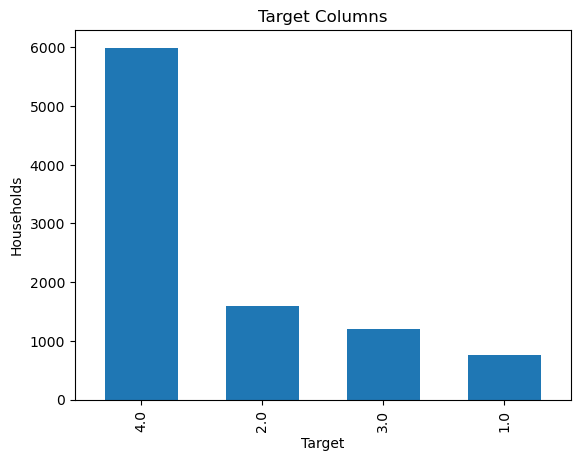

In [23]:
df['Target'].value_counts().plot.bar(width = 0.6)
plt.xlabel("Target")
plt.ylabel("Households")
plt.title("Target Columns")
plt.show()

# Check  all members of the house have the same poverty level.

In [24]:

poverty_equal = df.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1) 

poverty_nequal = poverty_equal[poverty_equal != True] 

print("There are {} Households Where All The Family Members of the House Donot have Same Poverty Level.".format(len(poverty_nequal)))

There are 7437 Households Where All The Family Members of the House Donot have Same Poverty Level.


# Check if there is a house without a family head.

In [25]:
Household_head = df.groupby('idhogar')['parentesco1'].sum()

In [26]:
Household_Without_Head = df.loc[df['idhogar'].isin(Household_head[Household_head == 0].index), :]
Household_Without_Head["idhogar"].nunique()

33

## Set Poverty Level of the members and the head of the house within a family.

In [27]:
Household_Without_Head_equal = Household_Without_Head.groupby('idhogar')['Target'].apply(lambda X: X.nunique() == 1) 

print("{} households without Target Value.".format(sum(Household_Without_Head_equal == False)))

18 households without Target Value.


In [28]:
#for household in poverty_nequal.index:
 
    #head_target = int(Train[(Train['idhogar'] == household) & (Train['parentesco1'] == 1.0)] ['Target'])
  
    #Train.loc[Train['idhogar'] == household, 'Target'] = head_target

## Check  Null values are existing in columns (Visualise)

<AxesSubplot:>

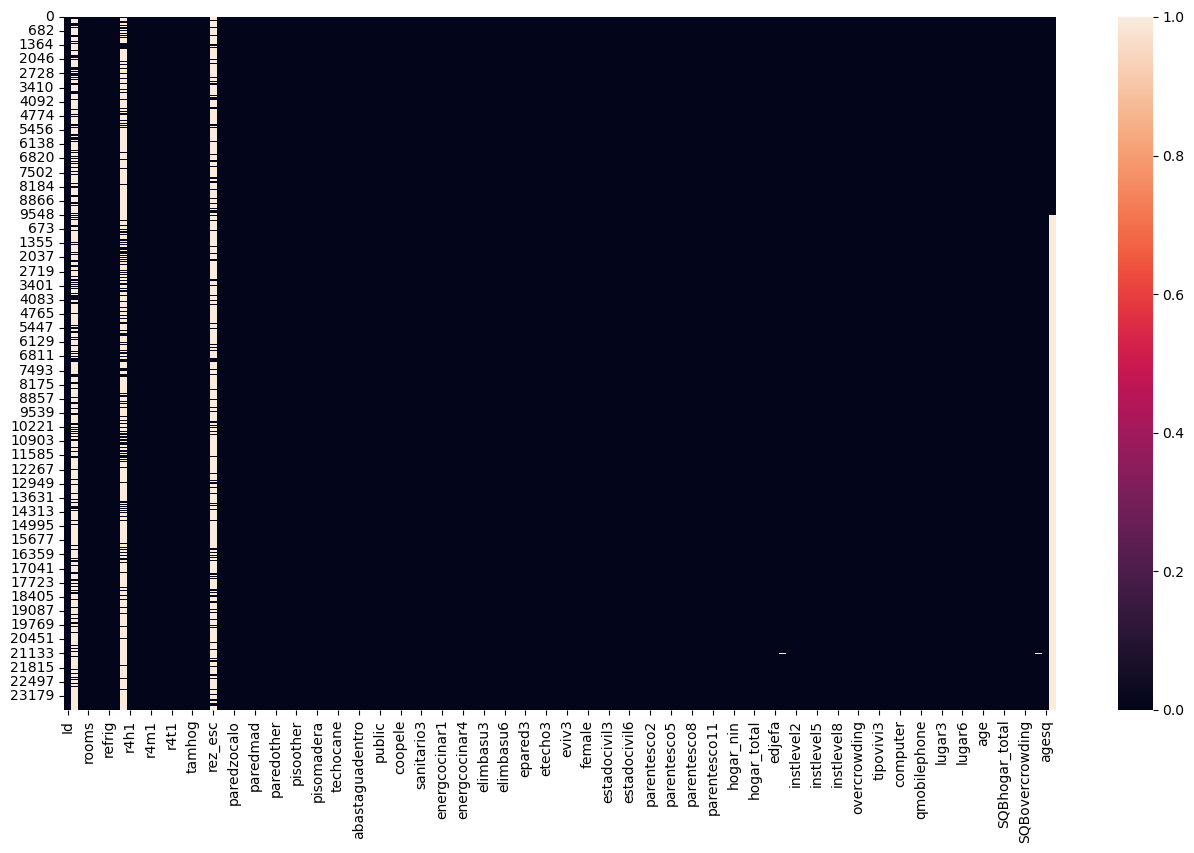

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [30]:
df_info = pd.DataFrame(columns=['Columns_Values', 'Null_Values', 'Dtype_Values', 'Unique_Values'])

for i in range(0, len(df.columns)):
    df_info.loc[i] = [df.columns[i],
                        df[df.columns[i]].isnull().sum()/df.shape[0] * 100,
                        df[df.columns[i]].dtypes,
                        df[df.columns[i]].nunique()] 
df_info

,Columns_Values,Null_Values,Dtype_Values,Unique_Values
0,Id,0.000000,object,33413
1,v2a1,72.615449,float64,302
2,hacdor,0.000000,int64,2
3,rooms,0.000000,int64,15
4,hacapo,0.000000,int64,2
5,v14a,0.000000,int64,2
6,refrig,0.000000,int64,2
7,v18q,0.000000,int64,2
8,v18q1,76.221830,float64,6
9,r4h1,0.000000,int64,7


# Missing Value Imputation

In [31]:
missing_value_imputation=df_info[df_info["Null_Values"] > 0]
print("Total Missing Value Features = " , len(missing_value_imputation))

Total Missing Value Features =  6


In [32]:
df_info[df_info["Null_Values"] > 0]

,Columns_Values,Null_Values,Dtype_Values,Unique_Values
1,v2a1,72.615449,float64,302
8,v18q1,76.221830,float64,6
21,rez_esc,82.545716,float64,7
103,meaneduc,0.107742,float64,211
140,SQBmeaned,0.107742,float64,211
142,Target,71.397360,float64,4


In [33]:
df_info["Null_Values"].sum()

302.9958399425374

In [34]:
#Remove null value rows of the target variable.
df[df["Target"] == 0]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


## Data Cleaning


In [35]:
#dependency = Dependency rate
#edjefe = years of education of male
#edjefa = years of education of female

df.loc[:, ["dependency", "edjefe", "edjefa"]].head(10)

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no
5,yes,11,no
6,yes,11,no
7,yes,9,no
8,yes,9,no
9,yes,9,no


In [36]:
mapping = {'yes' :1, 'no' :0}

for data in [df]:
    data['dependency'] = data['dependency'].replace(mapping).astype(float)
    data['edjefe']=data['edjefe'].replace(mapping).astype(float)
    data['edjefa']=data['edjefa'].replace(mapping).astype(float)

df.loc[:, ["dependency", "edjefe", "edjefa"]].head()

,dependency,edjefe,edjefa
0,0.0,10.0,0.0
1,8.0,12.0,0.0
2,8.0,0.0,11.0
3,1.0,11.0,0.0
4,1.0,11.0,0.0


In [37]:
# v2a1 = Monthly rent payment
# v18q1 = number of tablets household owns
# rez_esc = Years behind in school 
# meaneduc = average years of education
# SQBmeaned = square of the mean years of education of adults (>=18) in the household

data = df[df['v2a1'].isnull()].head()
data.loc[:, ["v2a1","tipovivi1","tipovivi2","tipovivi3","tipovivi4","tipovivi5"]]

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,NaN,1,0,0,0,0
13,NaN,1,0,0,0,0
14,NaN,1,0,0,0,0
26,NaN,1,0,0,0,0
32,NaN,1,0,0,0,0


In [38]:
df["v2a1"].value_counts().head()

100000.0    581
150000.0    579
200000.0    511
120000.0    379
50000.0     364
Name: v2a1, dtype: int64

Text(0.5, 1.0, 'Missing Rent Payments in Households ')

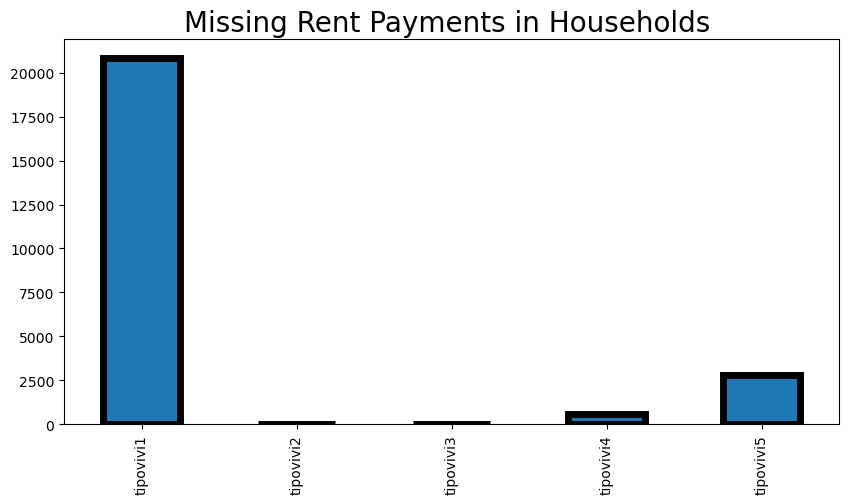

In [39]:
own_feature = [x for x in df if x.startswith('tipo')]

df.loc[df['v2a1'].isnull(), own_feature].sum().plot.bar(figsize = (10,5), edgecolor ='black', linewidth =5)

plt.title('Missing Rent Payments in Households ', size=20)

In [40]:
#v2a1:Monthly rent payment
for data in [df]:
    data['v2a1'].fillna(value=0, inplace=True)
    
df[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [41]:
df.loc[df['parentesco1'] ==1,["v18q","v18q1"]].head()

,v18q,v18q1
0,0,NaN
1,1,1.0
2,0,NaN
5,1,1.0
8,0,NaN


In [42]:
df.groupby(by="v18q1")['v18q1'].count()

v18q1
1.0    5883
2.0    1449
3.0     447
4.0     125
5.0      31
6.0      10
Name: v18q1, dtype: int64

In [43]:
for df in [df]:
    df['v18q1'].fillna(value=0, inplace=True)
    
df['v18q1'].isnull().sum()

0

In [44]:
#Checking related features of rez_sec when the value is not Null
df[df['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [45]:
df[df['rez_esc'].isna() & ((df['age'] > 7) & (df['age'] < 17))]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,1,1,1,1,2,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0369a5d78,1,2,0,3,0.50,11.0,0.0,13.500000,1,0,0,0,0,0,0,0,0,2,1.500000,0,1,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,10,0,100,9,121,1,2.250000,0.2500,182.25000,100,4.0
1520,ID_4a6a8bea3,0.0,1,4,1,1,1,0,0.0,0,5,5,2,2,4,2,7,9,9,9,0,NaN,9,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,21104dd07,4,5,1,9,1.25,0.0,6.0,12.000000,1,0,0,0,0,0,0,0,0,2,4.500000,1,0,0,0,0,0,0,1,6,1,0,0,0,0,0,1,0,10,0,100,81,0,16,20.250000,1.5625,144.00000,100,NaN
11869,ID_246d573ff,117000.0,0,5,0,1,1,1,1.0,0,3,3,0,3,3,0,6,6,6,6,0,NaN,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,154b9a558,3,3,0,6,1.00,6.0,0.0,13.333333,1,0,0,0,0,0,0,0,0,3,2.000000,0,1,0,0,0,0,1,1,5,1,0,0,0,0,0,1,0,15,0,225,36,36,9,4.000000,1.0000,177.77777,225,NaN
13450,ID_91ff26486,150000.0,0,5,0,1,1,1,1.0,2,1,3,0,1,1,2,2,4,4,4,0,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,08da0db86,2,2,0,4,1.00,9.0,0.0,10.500000,1,0,0,0,0,0,0,0,0,3,1.333333,0,1,0,0,0,0,1,1,2,1,0,0,0,0,0,0,1,9,0,81,16,81,4,1.777778,1.0000,110.25000,81,NaN


In [46]:
for data in [df]:
    data['rez_esc'].fillna(value = 0, inplace = True)

df['rez_esc'].isnull().sum()

0

In [47]:
#Lets analyze related features when meaneduc is NaN
df[df['meaneduc'].isnull()].loc[:,['age','meaneduc','edjefe','edjefa','instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9']]

,age,meaneduc,edjefe,edjefa,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
1291,18,NaN,0.0,10.0,0,0,0,1,0,0,0,0,0
1840,18,NaN,4.0,0.0,0,0,1,0,0,0,0,0,0
1841,18,NaN,4.0,0.0,0,1,0,0,0,0,0,0,0
2049,19,NaN,12.0,0.0,0,0,0,0,0,0,1,0,0
2050,19,NaN,12.0,0.0,0,0,0,0,0,0,1,0,0
4,18,NaN,0.0,11.0,0,0,0,0,1,0,0,0,0
535,18,NaN,0.0,11.0,0,0,0,0,1,0,0,0,0
536,19,NaN,0.0,12.0,0,0,0,0,0,0,0,1,0
537,19,NaN,0.0,12.0,0,0,0,0,0,0,0,1,0
2612,19,NaN,8.0,0.0,0,0,0,1,0,0,0,0,0


In [48]:
#Lets analyze related features when meaneduc is not NaN
df.loc[:,['Id','meaneduc','edjefe','edjefa','instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9']].head(10)

,Id,meaneduc,edjefe,edjefa,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,ID_279628684,10.0,10.0,0.0,0,0,0,1,0,0,0,0,0
1,ID_f29eb3ddd,12.0,12.0,0.0,0,0,0,0,0,0,0,1,0
2,ID_68de51c94,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0
3,ID_d671db89c,11.0,11.0,0.0,0,0,0,1,0,0,0,0,0
4,ID_d56d6f5f5,11.0,11.0,0.0,0,0,0,0,1,0,0,0,0
5,ID_ec05b1a7b,11.0,11.0,0.0,0,0,0,0,1,0,0,0,0
6,ID_e9e0c1100,11.0,11.0,0.0,0,1,0,0,0,0,0,0,0
7,ID_3e04e571e,10.0,9.0,0.0,1,0,0,0,0,0,0,0,0
8,ID_1284f8aad,10.0,9.0,0.0,0,0,0,1,0,0,0,0,0
9,ID_51f52fdd2,10.0,9.0,0.0,0,0,0,0,1,0,0,0,0


In [49]:
for data in [df]:
    data['meaneduc'].fillna(value = data['edjefe'], inplace = True)
    
df['meaneduc'].isnull().sum()

0

In [50]:
#Related features when SQBmeaned is NaN
df[df['SQBmeaned'].isnull()].loc[:, ['SQBmeaned','meaneduc','edjefe','edjefa','instlevel1','instlevel2']]

,SQBmeaned,meaneduc,edjefe,edjefa,instlevel1,instlevel2
1291,NaN,0.0,0.0,10.0,0,0
1840,NaN,4.0,4.0,0.0,0,0
1841,NaN,4.0,4.0,0.0,0,1
2049,NaN,12.0,12.0,0.0,0,0
2050,NaN,12.0,12.0,0.0,0,0
4,NaN,0.0,0.0,11.0,0,0
535,NaN,0.0,0.0,11.0,0,0
536,NaN,0.0,0.0,12.0,0,0
537,NaN,0.0,0.0,12.0,0,0
2612,NaN,8.0,8.0,0.0,0,0


In [51]:
#Related features when SQBmeaned is not NaN
df.loc[:,['SQBmeaned','meaneduc','edjefe','edjefa','instlevel1','instlevel2']].head(10)

,SQBmeaned,meaneduc,edjefe,edjefa,instlevel1,instlevel2
0,100.0,10.0,10.0,0.0,0,0
1,144.0,12.0,12.0,0.0,0,0
2,121.0,11.0,0.0,11.0,0,0
3,121.0,11.0,11.0,0.0,0,0
4,121.0,11.0,11.0,0.0,0,0
5,121.0,11.0,11.0,0.0,0,0
6,121.0,11.0,11.0,0.0,0,1
7,100.0,10.0,9.0,0.0,1,0
8,100.0,10.0,9.0,0.0,0,0
9,100.0,10.0,9.0,0.0,0,0


In [52]:
for data in [df]:
    data['SQBmeaned'].fillna(value = data['meaneduc']**2, inplace = True)
    
df['SQBmeaned'].isnull().sum()

0

In [53]:
#Dropping squared features
miss_value_drop = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

for df in [df]:
    df.drop(columns=miss_value_drop, inplace=True)

print(df.shape)

(33413, 134)


In [54]:
#Checking for the household redundant variables 

heads = df.loc[df['parentesco1'] == 1, :]
heads.shape

(10307, 134)

In [55]:
corr_matrix = heads.corr()
corr_matrix

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.000000,-0.032769,0.100734,-0.029459,0.019346,0.042326,0.195789,0.203998,0.031352,-0.005968,0.011915,0.042309,0.016512,0.035436,0.048094,0.006687,0.031799,0.025256,0.024403,0.299457,-0.007639,0.025256,0.163534,-0.070668,-0.074679,-0.033453,-0.082273,-0.026039,-0.014974,0.006475,0.149263,-0.133331,0.002105,-0.008142,-0.043814,-0.032946,-0.068320,0.088589,-0.006690,0.038507,0.190057,0.050900,-0.042956,-0.029138,0.079882,-0.009103,-0.026316,-0.073644,-0.014903,0.116634,-0.095848,-0.048044,-0.015734,-0.015703,0.102321,-0.065609,-0.084699,0.135296,-0.068595,-0.109829,-0.015814,-0.004070,-0.015283,-0.087582,-0.092559,0.141579,-0.087242,-0.081364,0.133591,-0.084210,-0.091998,0.136262,-0.071174,0.019986,-0.019986,NaN,0.022323,0.042948,0.029035,-0.053451,-0.086870,0.012128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042019,-0.008874,-0.138228,0.025256,-0.106110,0.181929,0.080557,0.274887,-0.070314,-0.123266,-0.128556,-0.015765,0.050855,-0.016351,0.024362,0.218367,0.157997,0.052899,-0.019066,-0.538905,0.520114,0.396131,-0.052541,-0.127885,0.115297,0.024233,0.070273,0.083024,0.170154,-0.051241,-0.037950,-0.064161,-0.085600,-0.061458,0.172910,-0.172910,-0.183021,0.166112
hacdor,-0.032769,1.000000,-0.197812,0.593867,-0.086701,-0.066409,-0.060223,-0.054685,0.243406,0.050627,0.175272,0.219364,0.095605,0.191594,0.302703,0.099775,0.246122,0.246793,0.297433,-0.085760,-0.003101,0.246793,-0.113787,0.026165,0.019816,0.122610,0.068846,0.086632,-0.007015,-0.005960,-0.143259,0.110713,-0.005960,0.026892,0.116650,0.026372,-0.036627,-0.007641,-0.008595,-0.006613,-0.148678,-0.036094,0.036627,0.005125,-0.004565,-0.003695,-0.002945,0.006355,0.064991,0.006987,-0.030309,0.053491,-0.007932,-0.012058,-0.035395,0.023407,0.033674,-0.060450,0.029765,0.051689,0.007229,-0.001652,-0.006817,0.146991,0.037738,-0.127219,0.112619,0.047893,-0.119760,0.151133,0.059861,-0.148503,-0.009093,-0.004727,0.004727,NaN,0.117096,-0.053557,-0.034294,0.009822,-0.017950,-0.022815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.295757,0.043431,-0.058321,0.246793,0.019191,-0.047917,-0.027628,-0.092093,0.026479,0.051752,0.010410,0.023881,-0.028470,0.023437,-0.012659,-0.067284,-0.028027,-0.189177,0.620093,-0.083256,-0.043135,0.046399,0.121261,0.072329,-0.054428,-0.041849,0.007934,0.026514,-0.054110,0.009782,0.027159,-0.008010,0.037814,0.030319,-0.009123,0.009123,-0.101290,-0.136275
rooms,0.100734,-0.197812,1.000000,-0.200073,0.117383,0.167631,0.239073,0.270780,-0.063504,0.207178,0.142401,-0.037158,0.241608,0.170502,-0.065971,0.308943,0.209940,0.204500,0.240274,0.241442,-0.009928,0.204500,0.246548,-0.051645,-0.137775,-0.101325,-0.111868,-0.078926,-0.002341,-0.013621,0.277902,-0.237015,0.011869,-0.013862,-0.129719,-0.060020,0.028352,-0.007

In [56]:
#Selecting the upper traingle of corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [57]:
#Finding the index of feature columns with correlation greater than 0.95
cols_to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

cols_to_drop

['tamhog', 'hhsize', 'coopele', 'female', 'hogar_total', 'area2']

In [58]:
#Dropping the cols_to_drop features
for df in [df]:
    df.drop(columns=cols_to_drop, inplace=True)

#Removing the male as well, as this would not be needed in model creation
for df in [df]:
    df.drop(columns = 'male',inplace=True)


#dropping 'Id' and 'idhogar' columns 
cols = ['Id','idhogar']
for df in [df]:
    df.drop(columns= cols, inplace=True)

print(df.shape)

(33413, 125)


In [59]:
df.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,10,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,43,4.0
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,67,4.0
2,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,11,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,92,4.0
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,9,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,17,4.0
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,37,4.0


<AxesSubplot:>

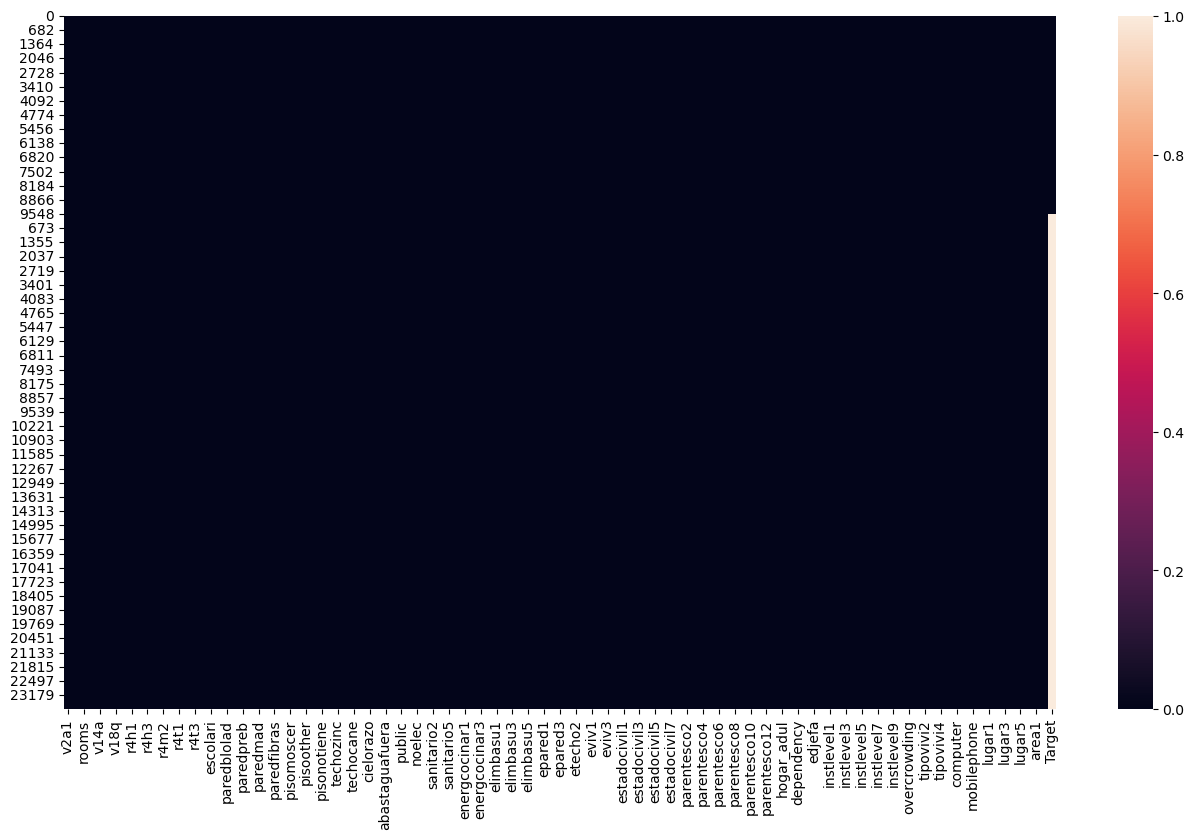

In [60]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [61]:
for df in [df]:
    df['Target'].fillna(value=0,inplace=True)
    
df['Target'].isnull().sum()

0

# Split Data For Training & Testing

In [62]:
print('Shape of Dataset is \n' ,df.shape)


Shape of Dataset is 
 (33413, 125)


In [63]:

features=['v2a1','hacdor','rooms','hacapo','v14a','refrig','v18q','v18q1','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','tamviv','escolari','rez_esc','paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother','pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera','techozinc','techoentrepiso','techocane','techootro','cielorazo','abastaguadentro','abastaguafuera','abastaguano','public','planpri','noelec','sanitario1','sanitario2','sanitario3','sanitario5','sanitario6','energcocinar1','energcocinar2','energcocinar3','energcocinar4','elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6','epared1','epared2','epared3','etecho1','etecho2','etecho3','eviv1','eviv2','eviv3','dis','estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7','parentesco1','parentesco2','parentesco3','parentesco4','parentesco5','parentesco6','parentesco7','parentesco8','parentesco9','parentesco10','parentesco11','parentesco12','hogar_nin','hogar_adul','hogar_mayor','dependency','edjefe','edjefa','meaneduc','instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9','bedrooms','overcrowding','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5','computer','television','mobilephone','qmobilephone','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','area1','age']
X = df.loc[:,features]
y = df.loc[:,['Target']]

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) 
print(X)

[[ 1.27990648 -0.22226846 -1.28695663 ... -0.29145041  0.62418173
   0.39631852]
 [ 0.78725623 -0.22226846 -0.62890439 ... -0.29145041  0.62418173
   1.50375274]
 [-0.42197621 -0.22226846  2.00330459 ... -0.29145041  0.62418173
   2.65733005]
 ...
 [-0.42197621 -0.22226846 -1.28695663 ...  3.43111549 -1.60209753
  -1.03411734]
 [-0.42197621 -0.22226846 -1.28695663 ...  3.43111549 -1.60209753
  -1.03411734]
 [-0.42197621 -0.22226846 -1.28695663 ...  3.43111549 -1.60209753
   0.76546326]]


In [65]:
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=0, test_size=0.1)

In [66]:
X_test.shape

(3342, 124)

In [67]:
X_train.shape

(30071, 124)

In [68]:
y_test.shape

(3342, 1)

In [69]:
y_train.shape

(30071, 1)

In [70]:
from sklearn.tree import DecisionTreeRegressor
ACC = DecisionTreeRegressor(max_depth = 2000, random_state = 3)

In [71]:
ACC.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2000, random_state=3)

In [72]:
# Predicting multiple observations
ACC.predict(X_test[0:10])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 4.])

In [73]:
print(f'accuracy of train set: {ACC.score(X_train, y_train)}')
print(f'accuracy of test set: {ACC.score(X_test, y_test)}')

accuracy of train set: 1.0
accuracy of test set: 0.7435860489271846


In [74]:
#instantiating the Random Forest Classifier with n_estimator as 150
rfc_model = RandomForestClassifier(n_estimators=150)

In [75]:
#Fitting the model
rfc_model.fit(X_train,y_train)

C:\Users\Esraa\AppData\Local\Temp\ipykernel_30832\2020403676.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=150)

In [76]:
#Predicting the y_pred_test
y_pred_test = rfc_model.predict(X_test)

In [77]:
#Checking accuracy score, confusion matrix and classification report on test data
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

[[2417    0    0    0    1]
 [  14   64    2    0    0]
 [  23    2  122    2    1]
 [  34    0    2   82    2]
 [ 148    0    0    0  426]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2418
         1.0       0.97      0.80      0.88        80
         2.0       0.97      0.81      0.88       150
         3.0       0.98      0.68      0.80       120
         4.0       0.99      0.74      0.85       574

    accuracy                           0.93      3342
   macro avg       0.96      0.81      0.87      3342
weighted avg       0.94      0.93      0.93      3342



In [78]:
print("Accuracy score of RFC model on test dataset is : ")
print(accuracy_score(y_test, y_pred_test))

Accuracy score of RFC model on test dataset is : 
0.9308797127468582


In [79]:
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(verbose=True, random_state=0)
svc.fit(X_train, y_train)

print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

[LibSVM]

C:\Users\Esraa\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
accuracy of train set: 0.7476971168235177
accuracy of test set: 0.7450628366247756


In [80]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(max_depth=3, random_state=0)
decisiontree.fit(X_train, y_train)

print('DecisionTreeClassifier')
print(f'accuracy of train set: {decisiontree.score(X_train, y_train)}')
print(f'accuracy of test set: {decisiontree.score(X_test, y_test)}')

DecisionTreeClassifier
accuracy of train set: 0.7141431944398258
accuracy of test set: 0.7250149611011371


In [81]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print('SGD Classifier')
print(f'accuracy of train set: {sgd.score(X_train, y_train)}')
print(f'accuracy of test set: {sgd.score(X_test, y_test)}')

C:\Users\Esraa\New folder\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGD Classifier
accuracy of train set: 0.7126134814272888
accuracy of test set: 0.72262118491921


In [ ]:
from sklearn.ensemble import VotingClassifier


estimators = [
  ("rf",rfc_model ),
  ("svc", svc),
  ("decisiontree", decisiontree),
  ("sgd", sgd),

]

vote = VotingClassifier(estimators=estimators)
vote.fit(X_train, y_train)

print('VotingClassifier')
print(f'accuracy of train set: {vote.score(X_train, y_train)}')
print(f'accuracy of test set: {vote.score(X_test, y_test)}')

C:\Users\Esraa\New folder\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esraa\New folder\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)


pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [ ]:
from sklearn.model_selection import cross_val_score
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=20)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))